## MVP Data Science - Lung Cancer

---

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm

## Dataset Load


---


In [ ]:
# GitHub raw URL
url = 'https://raw.githubusercontent.com/jpedrocf/DataScienceProject/main/dataset.csv'

lungcancerds = pd.read_csv(url)

lungcancerds.head(75)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,M,75,2,2,2,1,1,2,2,1,2,1,2,1,2,YES
71,M,52,2,1,1,1,1,2,2,1,1,2,1,1,2,YES
72,M,31,1,2,2,2,2,1,1,2,2,2,2,2,1,NO
73,M,48,2,1,2,1,2,1,2,2,2,2,2,1,2,YES


**Note: In this dataset, YES=2 & NO=1**

## Checking the age range for outliers


In [ ]:
lungcancerds['AGE'].describe().round(1)

,AGE
count,3000.0
mean,55.2
std,14.7
min,30.0
25%,42.0
50%,55.0
75%,68.0
max,80.0


## Null Checking

In [ ]:
lungcancerds.isnull().sum()


,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC_DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


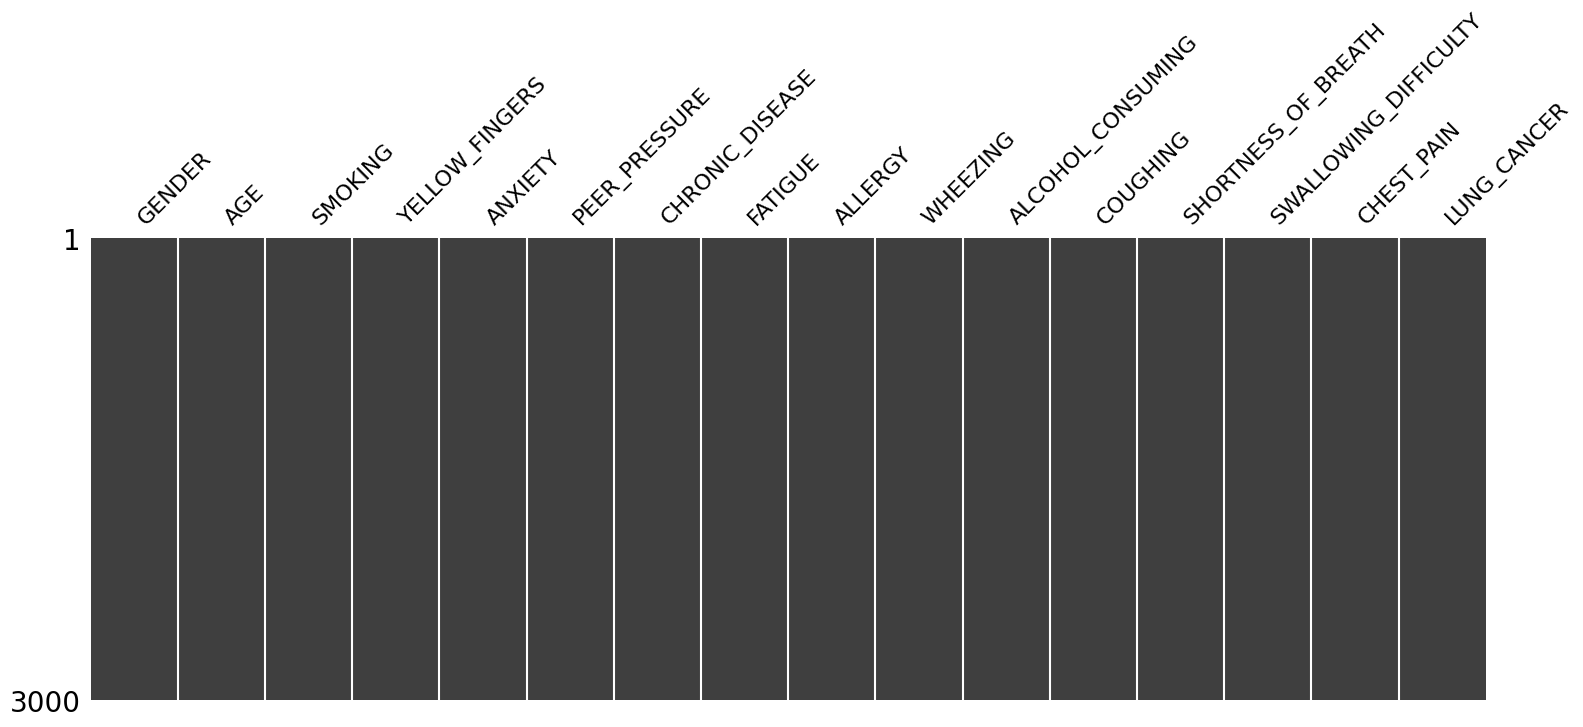

In [ ]:
col = list(lungcancerds.columns)

lcmsn = lungcancerds[col[:]]

lcmsn.replace(0, np.nan, inplace=True)

fig, ax = plt.subplots(figsize=(18, 6))

ms.matrix(lcmsn, ax=ax)

plt.show()

##Checking for Class Imbalance:

In [ ]:
class_counts = lungcancerds['LUNG_CANCER'].value_counts()
print(class_counts)


LUNG_CANCER
YES    1518
NO     1482
Name: count, dtype: int64


In [ ]:
# Getting the YES/NO count
num_yes = class_counts.get('YES', 0)
num_no = class_counts.get('NO', 0)

# Calculating the Imbalance
ratioimb = num_yes / num_no
print(f"Class Imbalance (YES:NO) = {ratioimb:.3f}")

Class Imbalance (YES:NO) = 1.024


There is no significant class imbalance in the sample, allowing for robust and reliable analyses. This balanced distribution supports the application of machine learning techniques effectively.

## Checking the columns content



In [ ]:
for coluna in lungcancerds.columns:
    print(f"Coluna: {coluna}")
    print(lungcancerds[coluna].value_counts())

Coluna: GENDER
GENDER
M    1514
F    1486
Name: count, dtype: int64
Coluna: AGE
AGE
54    73
67    71
75    71
47    70
69    70
78    69
55    69
79    68
53    66
32    66
39    65
37    65
77    64
46    64
63    63
50    63
33    62
70    61
68    61
35    60
48    60
36    60
71    59
76    59
31    59
56    58
62    58
57    58
52    57
80    57
61    57
60    57
34    57
42    56
41    56
49    56
64    56
59    55
51    55
43    55
44    54
38    53
40    51
58    51
74    50
65    49
66    48
45    47
72    46
73    43
30    42
Name: count, dtype: int64
Coluna: SMOKING
SMOKING
1    1527
2    1473
Name: count, dtype: int64
Coluna: YELLOW_FINGERS
YELLOW_FINGERS
2    1542
1    1458
Name: count, dtype: int64
Coluna: ANXIETY
ANXIETY
1    1518
2    1482
Name: count, dtype: int64
Coluna: PEER_PRESSURE
PEER_PRESSURE
1    1503
2    1497
Name: count, dtype: int64
Coluna: CHRONIC_DISEASE
CHRONIC_DISEASE
2    1529
1    1471
Name: count, dtype: int64
Coluna: FATIGUE
FATIGUE
1    1531
2    

**The tokenization and normalization processes are not applicable to this study, as the data is binary (1 or 2), representing categorical values rather than text. Therefore, these techniques are not necessary for the type of analysis required.**

## Pandas Profiling

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 33.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=a6f2bd047557ae0323108561adc5e0971ca038c0be41ee6febeee59ebbb34d03
  Stored in directory: /tmp/pip-ephem-wheel-cache-_bpw4ytk/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2941f84a70462ee15bc612ef18c55aae3431e31c5a1978e5295078e64cdf05dc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(lungcancerds, title='Lung Cancer Report', html={'style':{'full_width':False}},
                        vars={"target": "LUNG_CANCER"})

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
categorical_columns = lungcancerds.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['GENDER', 'LUNG_CANCER'], dtype='object')


In [ ]:
lungcancerds['LUNG_CANCER'] = lungcancerds['LUNG_CANCER'].map({'YES': 2, 'NO': 1})

In [ ]:
lungcancerdsclean = pd.get_dummies(lungcancerds, columns=['GENDER'], drop_first=True)

In [ ]:
X = lungcancerdsclean.drop(columns='LUNG_CANCER')
y = lungcancerdsclean['LUNG_CANCER']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [ ]:
classifier = RandomForestClassifier(random_state=28)

classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=28)

In [ ]:
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.51      0.54      0.52       292
           2       0.53      0.50      0.52       308

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



## Pearson Correlation

In [ ]:
lungcancerdsclean.corr(method = 'pearson').round(4)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,GENDER_M
AGE,1.0000,-0.0203,0.0161,0.0301,0.0038,-0.0257,-0.0023,0.0249,-0.0182,-0.0207,-0.0249,-0.0159,-0.0017,-0.0054,-0.0357,0.0110
SMOKING,-0.0203,1.0000,-0.0015,-0.0556,-0.0320,0.0457,0.0196,0.0049,0.0006,0.0030,0.0117,-0.0158,-0.0017,-0.0314,0.0142,-0.0285
YELLOW_FINGERS,0.0161,-0.0015,1.0000,0.0123,0.0114,-0.0132,-0.0108,-0.0057,0.0042,0.0272,0.0101,-0.0340,0.0186,-0.0066,0.0130,0.0144
ANXIETY,0.0301,-0.0556,0.0123,1.0000,-0.0247,0.0169,-0.0062,-0.0012,-0.0161,-0.0015,-0.0171,-0.0350,0.0338,0.0160,-0.0145,-0.0239
PEER_PRESSURE,0.0038,-0.0320,0.0114,-0.0247,1.0000,-0.0213,-0.0174,0.0114,-0.0113,0.0140,-0.0126,-0.0287,0.0160,-0.0393,-0.0246,0.0100
CHRONIC_DISEASE,-0.0257,0.0457,-0.0132,0.0169,-0.0213,1.0000,0.0111,-0.0196,0.0221,-0.0283,-0.0037,-0.0202,0.0164,-0.0140,-0.0102,0.0085
FATIGUE,-0.0023,0.0196,-0.0108,-0.0062,-0.0174,0.0111,1.0000,0.0049,0.0152,0.0003,-0.0016,0.0295,0.0102,0.0246,0.0022,0.0022
ALLERGY,0.0249,0.0049,-0.0057,-0.0012,0.0114,-0.0196,0.0049,1.0000,0.0054,-0.0118,-0.0456,-0.0424,0.0129,0.0187,0.0065,0.0132
WHEEZING,-0.0182,0.0006,0.0042,-0.0161,-0.0113,0.0221,0.0152,0.0054,1.0000,-0.0041,0.0161,-0.0121,-0.0234,-0.0160,-0.0386,-0.0093
ALCOHOL_CONSUMING,-0.0207,0.0030,0.0272,-0.0015,0.0140,-0.0283,0.0003,-0.0118,-0.0041,1.0000,0.0084,0.0009,0.0430,-0.0040,-0.0305,-0.0092


from matplotlib import pyplot as plt
_df_0['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SMOKING'].plot(kind='hist', bins=20, title='SMOKING')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['YELLOW_FINGERS'].plot(kind='hist', bins=20, title='YELLOW_FINGERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ANXIETY'].plot(kind='hist', bins=20, title='ANXIETY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AGE', y='SMOKING', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='SMOKING', y='YELLOW_FINGERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='YELLOW_FINGERS', y='ANXIETY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ANXIETY', y='PEER_PRESSURE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AGE'].plot(kind='line', figsize=(8, 4), title='AGE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['SMOKING'].plot(kind='line', figsize=(8, 4), title='SMOKING')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['YELLOW_FINGERS'].plot(kind='line', figsize=(8, 4), title='YELLOW_FINGERS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ANXIETY'].plot(kind='line', figsize=(8, 4), title='ANXIETY')
plt.gca().spines[['top', 'right']].set_visible(False)